In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import math
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm

In [4]:
agg = []
f=open("HeatShockProteins.csv","r")
next(f)
lines=f.readlines()
for x in lines:
    agg.append(x.replace("'","").strip('\n'))
f.close()
Expression = pd.read_csv('ExpressionGenesAndUniprot.csv')
Expression = Expression.drop(["Unnamed: 0"], axis =1)
len(agg)

4786

In [13]:
textfile = open("MappingAggregation.csv", "w")
for element in agg:
    textfile.write(element+"\n")
textfile.close()

In [14]:
xls = pd.ExcelFile('aggregation_paper.xlsx')
df1 = pd.read_excel(xls, 'Figure2A', skiprows=5)
df2 = pd.read_excel(xls, 'Figure2B', skiprows=5)
df2 = df2.drop(["set"], axis=1)
df3 = pd.read_excel(xls, 'Figure2C', skiprows=5)
df3 = df3.drop(["set"], axis=1)

In [15]:
test = pd.merge(df1, df2, on='gene_name')
df_merged =  pd.merge(test, df3, on='gene_name')

In [16]:
df_merged = df_merged.assign(gene_name=df_merged['gene_name'].str.split('|')).explode('gene_name')
df_merged['gene_name'] = df_merged['gene_name'].map(lambda x: x.strip("'"))
df_merged.rename(columns = {'gene_name':'Gene_name'}, inplace = True)
new = df_merged.copy()
new['binary']= pd.Series(np.where(new.set == 'soluble', 1, 0),new.index)


In [39]:
new

,Gene_name,solubility,set,gravy_score,isoelectric_point,binary
0,GTF3C1,-1.144012,aggregator,-0.538644,7.309740,0
1,KIN,-1.035102,aggregator,-0.858270,9.425171,0
2,ZNF451,-0.770775,aggregator,-0.578605,6.759448,0
3,KIF4A,-1.204963,aggregator,-0.748782,6.134053,0
4,MLH1,-0.750083,aggregator,-0.353439,5.481488,0
...,...,...,...,...,...,...
4781,A0A0U1RRH7,-0.573257,soluble,NaN,NaN,1
4781,HIST1H2AD,-0.573257,soluble,NaN,NaN,1
4782,HIF1AN,0.018946,soluble,-0.605444,5.280125,1
4783,SH3BP5,0.021802,soluble,-0.862198,4.621615,1


In [21]:
df_final = pd.merge(df_merged, Expression, on='Gene_name')

In [22]:
df_final = df_final.groupby(['Gene','Gene_name', 'Uniprot_ID', 'isoelectric_point', 'gravy_score', 'set', 'solubility']).agg({'Tissue': lambda x: ",".join(x), 'NX':'max'}).rename({'NX' : 'max_NX'},axis=1).reset_index()

In [23]:
df_final

,Gene,Gene_name,Uniprot_ID,isoelectric_point,gravy_score,set,solubility,Tissue,max_NX
0,ENSG00000000419,DPM1,O60762,10.018646,-0.292308,soluble,-0.046652,"amygdala,bone marrow,cervix, uterine,ductus de...",54.0
1,ENSG00000001036,FUCA2,Q9BTY2,6.195928,-0.295717,soluble,0.238562,"adrenal gland,basal ganglia,cerebral cortex,de...",40.7
2,ENSG00000001084,GCLC,P48506,5.980819,-0.443485,soluble,0.136042,"adipose tissue,B-cells,cerebellum,corpus callo...",32.4
3,ENSG00000001497,LAS1L,Q9Y4W2,4.359482,-0.596730,aggregator,-0.898631,"adipose tissue,B-cells,cerebellum,corpus callo...",38.3
4,ENSG00000002549,LAP3,P28838,8.054211,-0.172254,soluble,0.230621,"appendix,breast,colon,duodenum,fallopian tube,...",43.9
...,...,...,...,...,...,...,...,...,...
4416,ENSG00000278259,MYO19,Q96H55,7.731725,-0.274330,soluble,-0.022040,"adipose tissue,B-cells,cerebellum,corpus callo...",13.1
4417,ENSG00000278535,DHRS11,Q6UWP2,6.617711,-0.125000,soluble,0.155722,"adipose tissue,B-cells,cerebellum,corpus callo...",2.8
4418,ENSG00000278540,ACACA,Q13085,6.324807,-0.245652,soluble,-0.084824,"adipose tissue,B-cells,cerebellum,corpus callo...",10.7
4419,ENSG00000278619,MRM1,Q6IN84,8.017299,-0.264873,soluble,0.078851,"adipose tissue,B-cells,cerebellum,corpus callo...",6.7


p = 0.000000
skewness = -1.549622
kurtosis = 3.525734


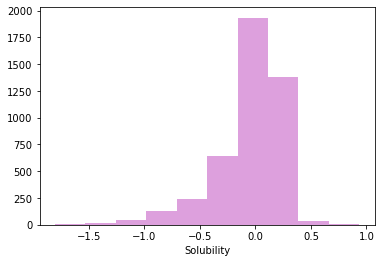

In [48]:
k2, p = stats.normaltest(df_final["solubility"])
print("p = {:f}".format(p))
plt.hist(df_final["solubility"], color = "plum")
plt.xlabel("Solubility")

print("skewness = {:f}".format(skew(df_final["solubility"])))
print("kurtosis = {:f}".format(kurtosis(df_final["solubility"])))

p = 0.000000
skewness = 0.457002
kurtosis = -0.523333


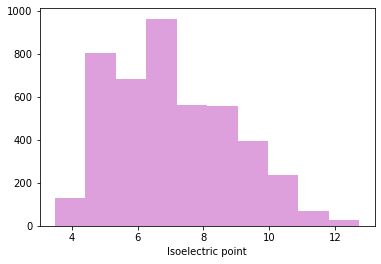

In [49]:
k2, p = stats.normaltest(df_final["isoelectric_point"])
print("p = {:f}".format(p))
plt.hist(df_final["isoelectric_point"], color = "plum")
plt.xlabel("Isoelectric point")
print("skewness = {:f}".format(skew(df_final["isoelectric_point"])))
print("kurtosis = {:f}".format(kurtosis(df_final["isoelectric_point"])))

p = 0.000000
skewness = -0.507318
kurtosis = 1.484317


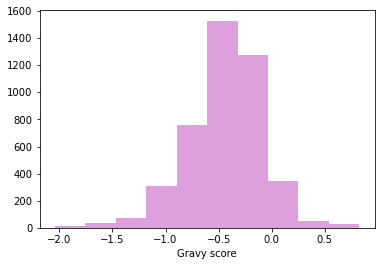

In [50]:
k2, p = stats.normaltest(df_final["gravy_score"])
print("p = {:f}".format(p))
plt.hist(df_final["gravy_score"], color = "plum")
plt.xlabel("Gravy score")
print("skewness = {:f}".format(skew(df_final["gravy_score"])))
print("kurtosis = {:f}".format(kurtosis(df_final["gravy_score"])))

p = 0.000000
skewness = 7.668722
kurtosis = 97.468587


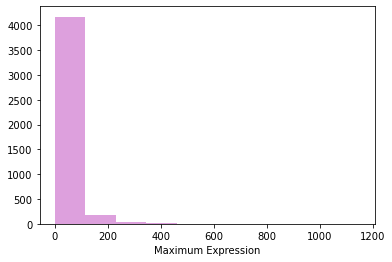

In [51]:
k2, p = stats.normaltest(df_final["max_NX"])
print("p = {:f}".format(p))
plt.hist(df_final["max_NX"], color = "plum")
plt.xlabel("Maximum Expression")
print("skewness = {:f}".format(skew(df_final["max_NX"])))
print("kurtosis = {:f}".format(kurtosis(df_final["max_NX"])))

## Making new column Binary_set where 1 = soluble and 0 = aggregator

4142


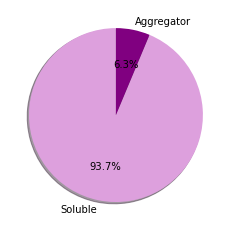

In [30]:
df_final["Binary_set"] = pd.Series(np.where(df_final.set == 'soluble', 1, 0),df_final.index)
print(df_final["Binary_set"].sum())
part = np.array((df_final["Binary_set"].sum()/(len(df_final["Binary_set"])), 1- (df_final["Binary_set"].sum()/(len(df_final["Binary_set"])))))
labels = ["Soluble", "Aggregator"]
colors = ["plum", "purple"]
plt.pie(part, labels= labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

[Text(0, 0, 'Aggregator'), Text(1, 0, 'Soluble')]

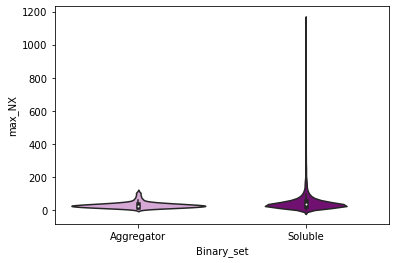

In [37]:
my_pal = {0: "plum", 1: "purple"}
ax = sns.violinplot(x="Binary_set", y="max_NX", data=df_final, palette=my_pal)
ax.set_xticklabels(["Aggregator",'Soluble'])

[Text(0, 0, 'Aggregator'), Text(1, 0, 'Soluble')]

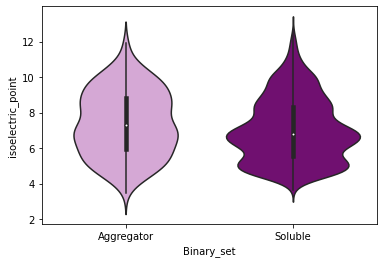

In [52]:
my_pal = {0: "plum", 1: "purple"}
ax = sns.violinplot(x="Binary_set", y="isoelectric_point", data=df_final, palette=my_pal)
ax.set_xticklabels(["Aggregator",'Soluble'])

[Text(0, 0, 'Aggregator'), Text(1, 0, 'Soluble')]

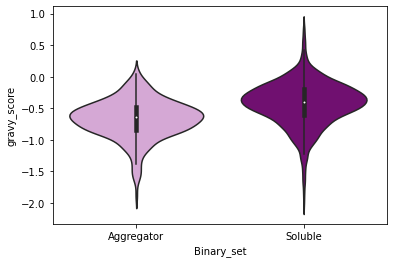

In [53]:
my_pal = {0: "plum", 1: "purple"}
ax = sns.violinplot(x="Binary_set", y="gravy_score", data=df_final, palette=my_pal)
ax.set_xticklabels(["Aggregator",'Soluble'])

[Text(0, 0, 'Aggregator'), Text(1, 0, 'Soluble')]

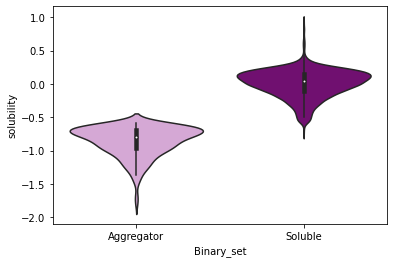

In [55]:
my_pal = {0: "plum", 1: "purple"}
ax = sns.violinplot(x="Binary_set", y="solubility", data=df_final, palette=my_pal)
ax.set_xticklabels(["Aggregator",'Soluble'])

In [57]:
df_sol = df_final[df_final['Binary_set'] == 1].reset_index().drop(["index"], axis = 1)
df_ag = df_final[df_final['Binary_set'] == 0].reset_index().drop(["index"], axis = 1)

In [58]:
stat, p = mannwhitneyu(df_sol["max_NX"] ,df_ag["max_NX"] )
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=706803.500, p=0.000


In [59]:
stat, p = mannwhitneyu(df_sol["solubility"] ,df_ag["solubility"] )
print('Statistics=%.3f, p=%f' % (stat, p))

Statistics=1155336.000, p=0.000000


## Adding LP predictions to dataframe

In [60]:
LP_pred = pd.read_csv("LHP_PREDICTIONS.tsv", sep='\t')
LP_pred.rename(columns = {'id':'Uniprot_ID', 'prediction':'LHPpred'}, inplace = True)
df_final = df_final.merge(LP_pred, on='Uniprot_ID', how='left')

In [61]:
df_final

,Gene,Gene_name,Uniprot_ID,isoelectric_point,gravy_score,set,solubility,Tissue,max_NX,Binary_set,LHPpred
0,ENSG00000000419,DPM1,O60762,10.018646,-0.292308,soluble,-0.046652,"amygdala,bone marrow,cervix, uterine,ductus de...",54.0,1,1719.856274
1,ENSG00000001036,FUCA2,Q9BTY2,6.195928,-0.295717,soluble,0.238562,"adrenal gland,basal ganglia,cerebral cortex,de...",40.7,1,1719.856274
2,ENSG00000001084,GCLC,P48506,5.980819,-0.443485,soluble,0.136042,"adipose tissue,B-cells,cerebellum,corpus callo...",32.4,1,882.618646
3,ENSG00000001497,LAS1L,Q9Y4W2,4.359482,-0.596730,aggregator,-0.898631,"adipose tissue,B-cells,cerebellum,corpus callo...",38.3,0,1015.981143
4,ENSG00000002549,LAP3,P28838,8.054211,-0.172254,soluble,0.230621,"appendix,breast,colon,duodenum,fallopian tube,...",43.9,1,1247.199980
...,...,...,...,...,...,...,...,...,...,...,...
4416,ENSG00000278259,MYO19,Q96H55,7.731725,-0.274330,soluble,-0.022040,"adipose tissue,B-cells,cerebellum,corpus callo...",13.1,1,1247.199980
4417,ENSG00000278535,DHRS11,Q6UWP2,6.617711,-0.125000,soluble,0.155722,"adipose tissue,B-cells,cerebellum,corpus callo...",2.8,1,1247.199980
4418,ENSG00000278540,ACACA,Q13085,6.324807,-0.245652,soluble,-0.084824,"adipose tissue,B-cells,cerebellum,corpus callo...",10.7,1,955.075030
4419,ENSG00000278619,MRM1,Q6IN84,8.017299,-0.264873,soluble,0.078851,"adipose tissue,B-cells,cerebellum,corpus callo...",6.7,1,1247.199980


p = 0.000000
skewness = 3.530726
kurtosis = 13.011694


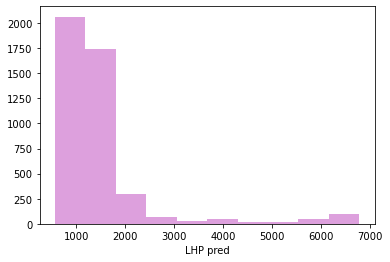

In [62]:
k2, p = stats.normaltest(df_final["LHPpred"], nan_policy = "omit")
print("p = {:f}".format(p))
plt.hist(df_final["LHPpred"], color = "plum")
plt.xlabel("LHP pred")
print("skewness = {:f}".format(skew(df_final["LHPpred"], nan_policy = "omit")))
print("kurtosis = {:f}".format(kurtosis(df_final["LHPpred"], nan_policy = "omit")))

## note cont = mann whitney and cat = fishers exact test (in EV rep in github)

[Text(0, 0, 'Aggregator'), Text(1, 0, 'Soluble')]

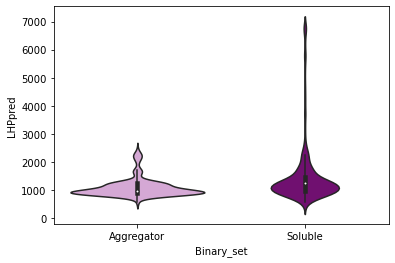

In [63]:
my_pal = {0: "plum", 1: "purple"}
ax = sns.violinplot(x="Binary_set", y="LHPpred", data=df_final, palette=my_pal)
ax.set_xticklabels(["Aggregator",'Soluble'])

In [174]:
df_final

,Gene,Gene_name,Uniprot_ID,isoelectric_point,gravy_score,set,solubility,Tissue,max_NX,Binary_set,LHPpred
0,ENSG00000000419,DPM1,O60762,10.018646,-0.292308,soluble,-0.046652,"amygdala,bone marrow,cervix, uterine,ductus de...",54.0,1,1719.856274
1,ENSG00000001036,FUCA2,Q9BTY2,6.195928,-0.295717,soluble,0.238562,"adrenal gland,basal ganglia,cerebral cortex,de...",40.7,1,1719.856274
2,ENSG00000001084,GCLC,P48506,5.980819,-0.443485,soluble,0.136042,"adipose tissue,B-cells,cerebellum,corpus callo...",32.4,1,882.618646
3,ENSG00000001497,LAS1L,Q9Y4W2,4.359482,-0.596730,aggregator,-0.898631,"adipose tissue,B-cells,cerebellum,corpus callo...",38.3,0,1015.981143
4,ENSG00000002549,LAP3,P28838,8.054211,-0.172254,soluble,0.230621,"appendix,breast,colon,duodenum,fallopian tube,...",43.9,1,1247.199980
...,...,...,...,...,...,...,...,...,...,...,...
4416,ENSG00000278259,MYO19,Q96H55,7.731725,-0.274330,soluble,-0.022040,"adipose tissue,B-cells,cerebellum,corpus callo...",13.1,1,1247.199980
4417,ENSG00000278535,DHRS11,Q6UWP2,6.617711,-0.125000,soluble,0.155722,"adipose tissue,B-cells,cerebellum,corpus callo...",2.8,1,1247.199980
4418,ENSG00000278540,ACACA,Q13085,6.324807,-0.245652,soluble,-0.084824,"adipose tissue,B-cells,cerebellum,corpus callo...",10.7,1,955.075030
4419,ENSG00000278619,MRM1,Q6IN84,8.017299,-0.264873,soluble,0.078851,"adipose tissue,B-cells,cerebellum,corpus callo...",6.7,1,1247.199980


## Adding TMHMM to dataframe, not very useful because out of 4421, 3902 are missing 

In [175]:
# TMHMM = pd.read_csv("TMHMM.csv")
# TMHMM.rename(columns = {'id':'Uniprot_ID'}, inplace = True)
# test = df_final.merge(TMHMM, on='Uniprot_ID', how='left')

## Adding MolPatch LP predictions to dataframe, not useful! No match!

In [176]:
# molpatch = pd.read_csv("large_patches_calculated_molpatch.csv")
# molpatch.rename(columns = {'id':'Uniprot_ID'}, inplace = True)
# test = df_final.merge(molpatch, on='Uniprot_ID', how='left')

## Adding features_human_proteome_no_filtering

In [64]:
features = pd.read_csv("features_human_proteome_no_filtering.csv")
features.rename(columns = {'id':'Uniprot_ID'}, inplace = True)

In [65]:
features

,Uniprot_ID,length,hydr_count,polar_count,molecular_weight,helix,turn,sheet,A,C,...,Methylation_MSD,coiled_coil,EGF,RAS_profile,RRM,ww_domain,transmembrane,TMHMM,Polar_exposed,Hydrophobic_exposed
0,Q8N7X0,10.703038,0.376125,0.431314,17.745289,0.225555,0.604079,0.170366,0.056989,0.011398,...,1.0,0,0,0,0,0,0,0,0.597984,0.161254
1,Q5T1N1,9.707359,0.290670,0.479665,16.719373,0.183014,0.777512,0.039474,0.052632,0.021531,...,1.0,0,0,0,0,0,0,0,0.570968,0.162903
2,Q92667,9.818582,0.376523,0.370986,16.793404,0.079734,0.805094,0.115172,0.079734,0.018826,...,0.0,1,0,0,0,0,1,1,0.447738,0.263651
3,Q5VUY0,8.668885,0.511057,0.312039,15.706400,0.491400,0.380835,0.127764,0.058968,0.039312,...,0.0,0,0,0,0,0,0,1,0.560000,0.256000
4,P62736,8.558421,0.427056,0.379310,15.574035,0.445623,0.347480,0.206897,0.076923,0.018568,...,1.0,0,0,0,0,0,0,0,0.682540,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20376,A0PK05,8.103288,0.458182,0.323636,15.087871,0.316364,0.683636,0.000000,0.087273,0.021818,...,0.0,0,0,0,0,0,1,1,0.364078,0.412621
20377,Q9HCN2,6.954196,0.370968,0.282258,13.887011,0.000000,0.750000,0.250000,0.088710,0.016129,...,1.0,0,0,0,0,0,0,0,0.397590,0.156627
20378,A0A0A0MS03,6.832890,0.412281,0.315789,13.836785,0.026316,0.535088,0.438596,0.061404,0.035088,...,0.0,0,0,0,0,0,1,0,0.388060,0.268657
20379,A0A0A6YYK4,6.845490,0.417391,0.347826,13.838505,0.026087,0.573913,0.400000,0.104348,0.026087,...,0.0,0,0,0,0,0,1,0,0.449275,0.275362


In [67]:
df_final = df_final.merge(features, on='Uniprot_ID', how='left')

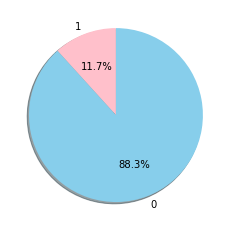

In [68]:
part = np.array((df_final["TMHMM"].sum()/(len(df_final["TMHMM"])), 1- (df_final["TMHMM"].sum()/(len(df_final["TMHMM"])))))
labels = ["1", "0"]
colors = ["pink", "skyblue"]
plt.pie(part, labels= labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [69]:
df_final.columns.values

array(['Gene', 'Gene_name', 'Uniprot_ID', 'isoelectric_point_x',
       'gravy_score', 'set', 'solubility', 'Tissue', 'max_NX',
       'Binary_set', 'LHPpred', 'length', 'hydr_count', 'polar_count',
       'molecular_weight', 'helix', 'turn', 'sheet', 'A', 'C', 'D', 'E',
       'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
       'V', 'W', 'Y', 'fasta_sequence', 'thsa_netsurfp2',
       'tasa_netsurfp2', 'rhsa_netsurfp2', 'disorder', 'A_exposed',
       'C_exposed', 'D_exposed', 'E_exposed', 'F_exposed', 'G_exposed',
       'H_exposed', 'I_exposed', 'K_exposed', 'L_exposed', 'M_exposed',
       'N_exposed', 'P_exposed', 'Q_exposed', 'R_exposed', 'S_exposed',
       'T_exposed', 'V_exposed', 'W_exposed', 'Y_exposed',
       'Prob. of Solubility', 'Aggregation_propensity', 'Aromaticity',
       'Instability_index', 'Gravy', 'isoelectric_point_y', 'charge_at_7',
       'charge_at_5', 'HSP', 'PTM_UP', 'Citrullination_UP',
       'GPI-anchor_UP', 'Lipoprotein_UP', 'Nitrat

p = 0.000000
skewness = -3.450656
kurtosis = 20.513739


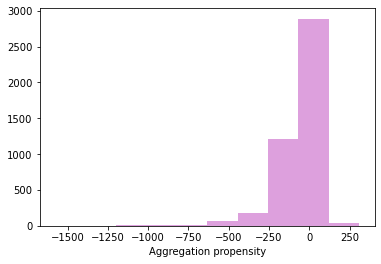

In [70]:
k2, p = stats.normaltest(df_final["Aggregation_propensity"], nan_policy = "omit")
print("p = {:f}".format(p))
plt.hist(df_final["Aggregation_propensity"], color = "plum")
plt.xlabel('Aggregation propensity')

print("skewness = {:f}".format(skew(df_final["Aggregation_propensity"], nan_policy = "omit")))
print("kurtosis = {:f}".format(kurtosis(df_final["Aggregation_propensity"], nan_policy = "omit")))


p = 0.000000
skewness = -0.470571
kurtosis = -0.009316


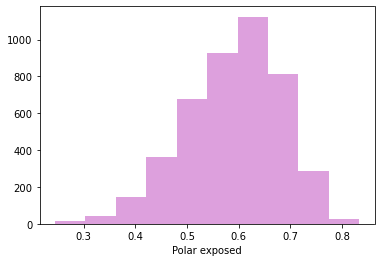

In [71]:
k2, p = stats.normaltest(df_final["Polar_exposed"], nan_policy = "omit")
print("p = {:f}".format(p))
plt.hist(df_final["Polar_exposed"], color = "plum")
plt.xlabel("Polar exposed")

print("skewness = {:f}".format(skew(df_final["Polar_exposed"], nan_policy = "omit")))
print("kurtosis = {:f}".format(kurtosis(df_final["Polar_exposed"], nan_policy = "omit")))


p = 0.000000
skewness = 1.100247
kurtosis = 1.888124


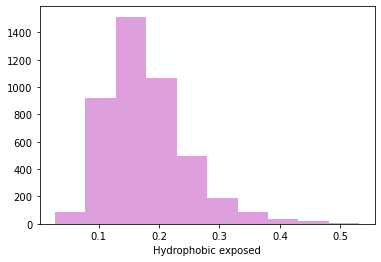

In [72]:
k2, p = stats.normaltest(df_final["Hydrophobic_exposed"], nan_policy = "omit")
print("p = {:f}".format(p))
plt.hist(df_final["Hydrophobic_exposed"], color = "plum")
plt.xlabel("Hydrophobic exposed")

print("skewness = {:f}".format(skew(df_final["Hydrophobic_exposed"], nan_policy = "omit")))
print("kurtosis = {:f}".format(kurtosis(df_final["Hydrophobic_exposed"], nan_policy = "omit")))


In [184]:
df_final

,Gene,Gene_name,Uniprot_ID,isoelectric_point_x,gravy_score,set,solubility,Tissue,max_NX,Binary_set,...,Methylation_MSD,coiled_coil,EGF,RAS_profile,RRM,ww_domain,transmembrane,TMHMM,Polar_exposed,Hydrophobic_exposed
0,ENSG00000000419,DPM1,O60762,10.018646,-0.292308,soluble,-0.046652,"amygdala,bone marrow,cervix, uterine,ductus de...",54.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.563636,0.200000
1,ENSG00000001036,FUCA2,Q9BTY2,6.195928,-0.295717,soluble,0.238562,"adrenal gland,basal ganglia,cerebral cortex,de...",40.7,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.627586,0.172414
2,ENSG00000001084,GCLC,P48506,5.980819,-0.443485,soluble,0.136042,"adipose tissue,B-cells,cerebellum,corpus callo...",32.4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.711957,0.086957
3,ENSG00000001497,LAS1L,Q9Y4W2,4.359482,-0.596730,aggregator,-0.898631,"adipose tissue,B-cells,cerebellum,corpus callo...",38.3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.617284,0.143210
4,ENSG00000002549,LAP3,P28838,8.054211,-0.172254,soluble,0.230621,"appendix,breast,colon,duodenum,fallopian tube,...",43.9,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.662338,0.162338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4416,ENSG00000278259,MYO19,Q96H55,7.731725,-0.274330,soluble,-0.022040,"adipose tissue,B-cells,cerebellum,corpus callo...",13.1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.564706,0.144118
4417,ENSG00000278535,DHRS11,Q6UWP2,6.617711,-0.125000,soluble,0.155722,"adipose tissue,B-cells,cerebellum,corpus callo...",2.8,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.623853,0.174312
4418,ENSG00000278540,ACACA,Q13085,6.324807,-0.245652,soluble,-0.084824,"adipose tissue,B-cells,cerebellum,corpus callo...",10.7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.736177,0.069510
4419,ENSG00000278619,MRM1,Q6IN84,8.017299,-0.264873,soluble,0.078851,"adipose tissue,B-cells,cerebellum,corpus callo...",6.7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.522727,0.198864


## Checking with OpusTass

In [185]:
OT_uni=[]
OT_pdb=[]

f=open("OpusTassUniPDB.txt","r")
lines=f.readlines()
for x in lines:
    OT_pdb.append(x.split('\t')[0].strip())
    OT_uni.append(x.split('\t')[1].strip())
f.close()

In [186]:
ones = np.ones(len(OT_uni))
OT = {"Uniprot_ID":OT_uni,
  "ones": ones}
df_OT = pd.DataFrame(OT)

In [187]:
df_OT

,Uniprot_ID,ones
0,O14832,1.0
1,O00327,1.0
2,O15516,1.0
3,P29323,1.0
4,P53396,1.0
...,...,...
1692,Q9H8S9,1.0
1693,Q8TDY4,1.0
1694,O00764,1.0
1695,P62837,1.0


In [188]:
test = df_final.merge(df_OT, on='Uniprot_ID', how='left')

In [189]:
len(test["ones"])-test["ones"].isnull().sum()

727

## Correlation

<AxesSubplot:>

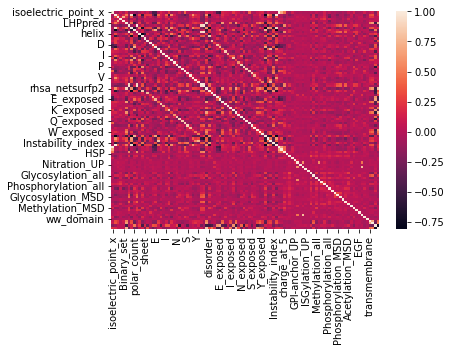

In [190]:
corr = df_final.corr()
sns.heatmap(corr)

In [191]:
new =corr[corr >0.5]
positive_corr = new.notnull().sum()
positive_corr = positive_corr[positive_corr >1]
positive_corr
new =corr[corr <-0.5]
negative_corr = new.notnull().sum()
negative_corr = negative_corr[negative_corr >1]
negative_corr

gravy_score               6
hydr_count                5
polar_count               4
helix                     2
turn                      5
E                         2
rhsa_netsurfp2            3
disorder                  5
E_exposed                 2
Prob. of Solubility       8
Aggregation_propensity    6
Instability_index         3
Gravy                     6
Polar_exposed             6
dtype: int64

In [192]:
new =corr[corr ==1]
test = new.notnull().sum()
test.sum()

100

## Check Correlation with Expression and Solubility 

In [205]:
expression = df_final["max_NX"]
others = df_final.drop(['solubility', 'max_NX','Gene','Gene_name','Tissue'], axis=1)
solubility = df_final["solubility"]


## No correlation with expression 

In [246]:
corr_with_expression = others.corrwith(expression, axis=0, drop=False)
new =corr_with_expression[corr_with_expression >0.1]
new
new =corr_with_expression[corr_with_expression <-0.1]
new


length              -0.253792
molecular_weight    -0.253551
L                   -0.147228
Q                   -0.108299
S                   -0.127809
thsa_netsurfp2      -0.230915
tasa_netsurfp2      -0.231393
Q_exposed           -0.112398
S_exposed           -0.153015
Instability_index   -0.138784
Glycosylation_MSD   -0.108608
dtype: float64

## Only correlation with Binary_set (positive correlation) which is nice 

In [254]:
corr_with_sol= others.corrwith(solubility, axis=0, drop=False)
new =corr_with_sol[corr_with_sol >0.1]
# new =corr_with_sol[corr_with_sol <-0.1]
new



gravy_score               0.324624
Binary_set                0.714416
LHPpred                   0.195885
hydr_count                0.322995
sheet                     0.212844
C                         0.110777
F                         0.205278
G                         0.107213
I                         0.200212
V                         0.238942
W                         0.130497
Y                         0.135335
rhsa_netsurfp2            0.234830
D_exposed                 0.108506
F_exposed                 0.127716
W_exposed                 0.120441
Aggregation_propensity    0.303951
Aromaticity               0.226396
Gravy                     0.325203
Glycosylation_all         0.147639
Palmitoylation_all        0.155960
transmembrane             0.222719
TMHMM                     0.205465
dtype: float64

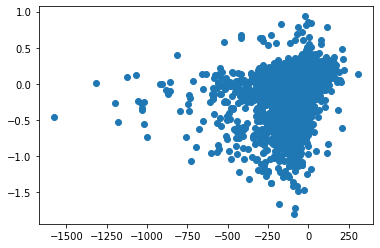

In [255]:
plt.scatter(x="Prob. of Solubility", y="solubility", data=df_final)

## Check overlap with SWI dataset 

In [193]:
Sol_complete = pd.read_csv("sol_uniprot_complete.csv")
Sol_complete = Sol_complete.drop(['Unnamed: 0'], axis=1)
Sol_complete


,Sequence,Solubility(%),Binary_Solubility,id,Amino_acid_counts,Molecular_Weight,Flexibility,Aromaticity,Instability_index,Gravy_Score,...,S,T,V,W,Y,Total_Residues,Proline_fraction,Cysteine_fraction,Turn_NPGS_fraction,UniprotID
0,MRGSHHHHHHTDPALRAMKLYNLKDHNEQVSFAQAVTQGLGKNQGL...,18.0,0,1_eSOL,"{'A': 49, 'C': 5, 'D': 25, 'E': 29, 'F': 24, '...",49578.9941,"[0.9794285714285715, 0.9709404761904762, 0.964...",0.080000,34.978911,-0.147333,...,20,24,27,3,9,450,0.053333,0.011111,0.208889,P00934
1,MRGSHHHHHHTDPALRAMKKMQSIVLALSLVLVAPMAAQAAEITLV...,78.0,1,2_eSOL,"{'A': 9, 'C': 1, 'D': 6, 'E': 2, 'F': 0, 'G': ...",13820.5399,"[0.9794285714285715, 0.9709404761904762, 0.964...",0.075000,40.945833,-1.021667,...,4,2,5,6,3,120,0.083333,0.008333,0.250000,P75616
2,MRGSHHHHHHTDPALRAMLILISPAKTLDYQSPLTTTRYTLPELLD...,7.0,0,3_eSOL,"{'A': 21, 'C': 1, 'D': 18, 'E': 16, 'F': 16, '...",32051.1943,"[0.9794285714285715, 0.9709404761904762, 0.964...",0.100000,30.551821,-0.460000,...,16,14,7,2,10,280,0.046429,0.003571,0.210714,P0A8I4
3,MRGSHHHHHHTDPALRAMTDKLTSLRQYTTVVADTGDIAAMKLYQP...,85.0,1,4_eSOL,"{'A': 41, 'C': 4, 'D': 22, 'E': 25, 'F': 7, 'G...",37684.5512,"[0.9794285714285715, 0.9709404761904762, 0.964...",0.067847,30.741593,-0.269617,...,17,18,16,4,12,339,0.032448,0.011799,0.174041,P0A872
4,MRGSHHHHHHTDPALRAMNTLRIGLVSISDRASSGVYQDKGIPALE...,89.0,1,5_eSOL,"{'A': 18, 'C': 4, 'D': 10, 'E': 17, 'F': 5, 'G...",23687.8455,"[0.9794285714285715, 0.9709404761904762, 0.964...",0.041475,37.564977,-0.126728,...,13,15,18,1,3,217,0.064516,0.018433,0.216590,P0AF05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,MEIYVFTPEGRIVELPAGATPVDFAYVVHTDIGHACVGARVDRQPY...,NaN,1,12211_DNASU,"{'A': 7, 'C': 1, 'D': 3, 'E': 5, 'F': 2, 'G': ...",8231.1757,"[0.9647261904761903, 0.9933690476190475, 1.000...",0.066667,33.241333,-0.154667,...,3,5,8,0,3,75,0.093333,0.013333,0.213333,P0AG26
17647,MEIYVFTPEGRIVELPAGATPVDFAYVVHTDIGHACVGARVDRQPY...,NaN,1,12212_DNASU,"{'A': 9, 'C': 1, 'D': 3, 'E': 5, 'F': 2, 'G': ...",8770.7592,"[0.9647261904761903, 0.9933690476190475, 1.000...",0.075000,35.738750,-0.175000,...,3,5,8,1,3,80,0.100000,0.012500,0.225000,P0AG26
17648,MDLFPDEIYVFTPEGRIVELPAGATPVDFAYVVHTDIGHACVGARV...,NaN,1,12213_DNASU,"{'A': 9, 'C': 1, 'D': 5, 'E': 5, 'F': 3, 'G': ...",9358.3806,"[1.0076904761904761, 1.009845238095238, 0.9627...",0.082353,35.603529,-0.188235,...,3,5,8,1,3,85,0.105882,0.011765,0.223529,P0AG26
17649,MVEQEQEAITFEVVAREWHASNRQWSEAHSARVLKSLEDNLFQAIG...,NaN,1,12214_DNASU,"{'A': 16, 'C': 0, 'D': 4, 'E': 11, 'F': 2, 'G'...",13737.3856,"[1.0280357142857144, 1.0478214285714287, 1.005...",0.049587,44.284298,-0.554545,...,6,5,8,2,2,121,0.024793,0.000000,0.157025,P39347


In [194]:
Sol_complete.rename(columns = {'UniprotID':'Uniprot_ID'}, inplace = True)
test = df_final.merge(Sol_complete, on='Uniprot_ID', how='left')

## How does size of DF increase ? (number of rows increases) 

In [195]:
test["Sequence"]

,Gene,Gene_name,Uniprot_ID,isoelectric_point_x,gravy_score,set,solubility,Tissue,max_NX,Binary_set,...,R_y,S_y,T_y,V_y,W_y,Y_y,Total_Residues,Proline_fraction,Cysteine_fraction,Turn_NPGS_fraction
0,ENSG00000000419,DPM1,O60762,10.018646,-0.292308,soluble,-0.046652,"amygdala,bone marrow,cervix, uterine,ductus de...",54.0,1,...,12.0,12.0,9.0,23.0,1.0,13.0,257.0,0.015564,0.015564,0.202335
1,ENSG00000001036,FUCA2,Q9BTY2,6.195928,-0.295717,soluble,0.238562,"adrenal gland,basal ganglia,cerebral cortex,de...",40.7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSG00000001084,GCLC,P48506,5.980819,-0.443485,soluble,0.136042,"adipose tissue,B-cells,cerebellum,corpus callo...",32.4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ENSG00000001497,LAS1L,Q9Y4W2,4.359482,-0.596730,aggregator,-0.898631,"adipose tissue,B-cells,cerebellum,corpus callo...",38.3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ENSG00000002549,LAP3,P28838,8.054211,-0.172254,soluble,0.230621,"appendix,breast,colon,duodenum,fallopian tube,...",43.9,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,ENSG00000278259,MYO19,Q96H55,7.731725,-0.274330,soluble,-0.022040,"adipose tissue,B-cells,cerebellum,corpus callo...",13.1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5228,ENSG00000278535,DHRS11,Q6UWP2,6.617711,-0.125000,soluble,0.155722,"adipose tissue,B-cells,cerebellum,corpus callo...",2.8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5229,ENSG00000278540,ACACA,Q13085,6.324807,-0.245652,soluble,-0.084824,"adipose tissue,B-cells,cerebellum,corpus callo...",10.7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5230,ENSG00000278619,MRM1,Q6IN84,8.017299,-0.264873,soluble,0.078851,"adipose tissue,B-cells,cerebellum,corpus callo...",6.7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
test.nunique()

Gene                   4419
Gene_name              4419
Uniprot_ID             4421
isoelectric_point_x    4419
gravy_score            4395
                       ... 
Y_y                      27
Total_Residues          392
Proline_fraction        832
Cysteine_fraction       700
Turn_NPGS_fraction      941
Length: 144, dtype: int64

In [239]:
test["Sequence"].isnull().sum()

4035

## Check Solubility vs Solubility probability

In [3]:
my_pal = {"soluble": "pink", "aggregator": "skyblue"}
sns.violin(x="set", y="Prob. of Solubility", data=df_final, palette=my_pal)


NameError: name 'sns' is not defined

## So this shows us that everything that is predicted is indeed soluble 

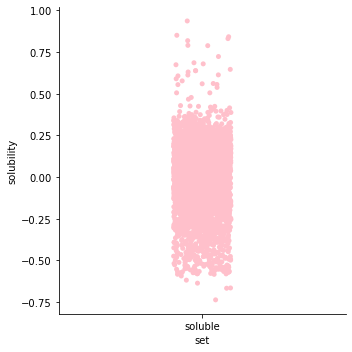

In [236]:
sol_and_prob_sol = df_final[df_final["Binary_set"]==1]
sol_and_prob_sol[abs(sol_and_prob_sol["solubility"])>0.5].reset_index()
my_pal = {"soluble": "pink", "aggregator": "skyblue"}
sns.catplot(x="set", y="solubility", data=sol_and_prob_sol, palette=my_pal)


## Saving Final Dataset

In [240]:
df_final.to_csv('Final_merged_dataset.csv')  